In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import os

## Make individual histogram

In [2]:
# name = 'dropout_v3_0_10_R2plus1DMotionSegNet.pth.csv'
name = 'Original_Pretrained_R2plus1DMotionSegNet.pth.csv'
save_hists_as_svg = True

ef_grouping = "Predicted EF"
gls_type = "Warp GLS"
create_GT = False

/opt/anaconda3/envs/dynamic37-wang/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/anaconda3/envs/dynamic37-wang/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/dynamic37-wang/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

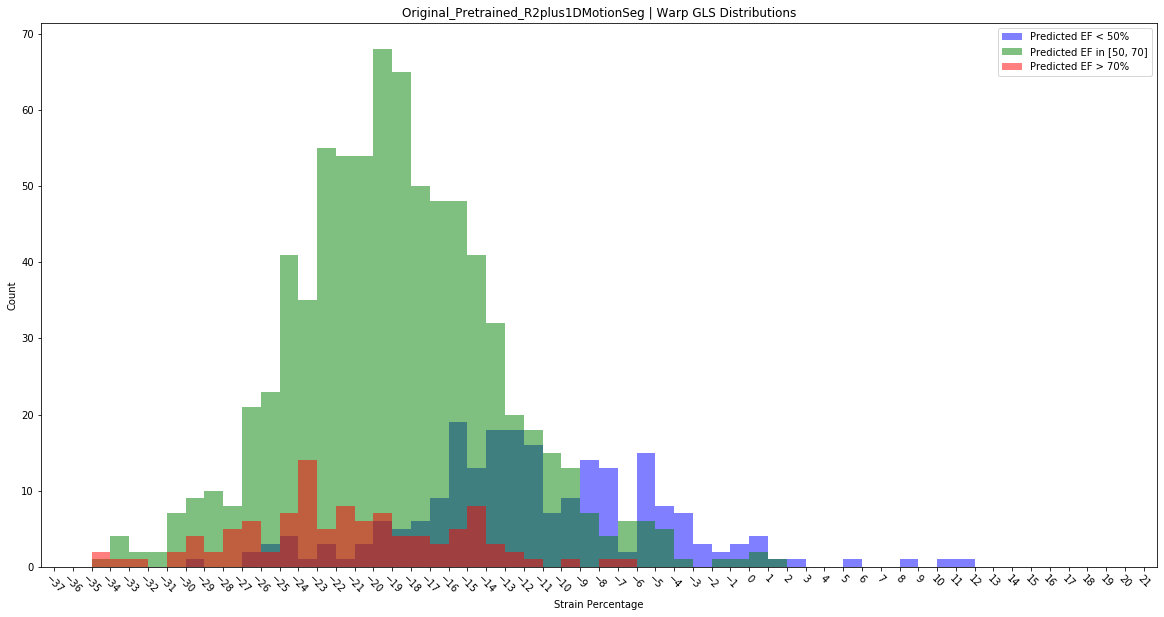

In [3]:
data = pd.read_csv(f'./csvs/{name}')
    
_min = -0.35 * 100
_max = 0.20 * 100
step = 0.01 * 100

############## Predicted ##############
low_efs = data.query(f"`{ef_grouping}` < 50")
normal_efs = data.query(f"`{ef_grouping}` >= 50 and `{ef_grouping}` <= 70")
high_efs = data.query(f"`{ef_grouping}` > 70")

# multiple values by 100 to change data representation from decimal as a percent to regular value as a percent
low_efs[f'{gls_type}'] *= 100
normal_efs[f'{gls_type}'] *= 100
high_efs[f'{gls_type}'] *= 100

fig, ax = plt.subplots(1,1,figsize=(20,10))
plt.hist(low_efs[f'{gls_type}'], bins=np.arange(_min, _max, step), color='blue', alpha=0.5, label=f'{ef_grouping} < 50%')
plt.hist(normal_efs[f'{gls_type}'], bins=np.arange(_min, _max, step), color='green', alpha=0.5, label=f'{ef_grouping} in [50, 70]')
plt.hist(high_efs[f'{gls_type}'], bins=np.arange(_min, _max, step), color='red', alpha=0.5, label=f'{ef_grouping} > 70%')

plt.xticks(rotation = -45)

loc = plticker.MultipleLocator(base=step) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

# labels = [item for item in ax.get_xticklabels()]

plt.legend()
plt.title(f'{name[:-11]} | {gls_type} Distributions')
plt.xlabel('Strain Percentage')
plt.ylabel('Count')
if save_hists_as_svg:
    plt.savefig(f'./images/{name[:-11]}_predicted_hist.svg')

# plt.show()

############## Ground Truth ##############
if create_GT:
    truth_low_efs = data.query("`True EF` < 50")
    truth_normal_efs = data.query("`True EF` >= 50 and `True EF` <= 70")
    truth_high_efs = data.query("`True EF` > 70")

    truth_low_efs['True GLS'] *= 100
    truth_normal_efs['True GLS'] *= 100
    truth_high_efs['True GLS'] *= 100

    fig, ax = plt.subplots(1,1,figsize=(20,10))
    plt.hist(truth_low_efs['True GLS'], bins=np.arange(_min, _max, step), color='blue', alpha=0.5, label='EF < 50%')
    plt.hist(truth_normal_efs['True GLS'], bins=np.arange(_min, _max, step), color='green', alpha=0.5, label='EF in [50, 70]')
    plt.hist(truth_high_efs['True GLS'], bins=np.arange(_min, _max, step), color='red', alpha=0.5, label='EF > 70%')

    plt.xticks(rotation = -45)

    loc = plticker.MultipleLocator(base=step) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)


    plt.legend()
    plt.title(f'{name[:-11]} | Ground Truth GLS Distributions')
    plt.xlabel('Strain Percentage')
    plt.ylabel('Count')
    if save_hists_as_svg:
        plt.savefig(f'./images/{name[:-11]}_truth_hist.svg')

## Make a bunch of histograms for each `csv` file in the `./csvs/` folder.

In [2]:
filenames = os.listdir("./csvs/")
save_hists_as_svg = True

/opt/anaconda3/envs/dynamic37-wang/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/dynamic37-wang/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/dynamic37-wang/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

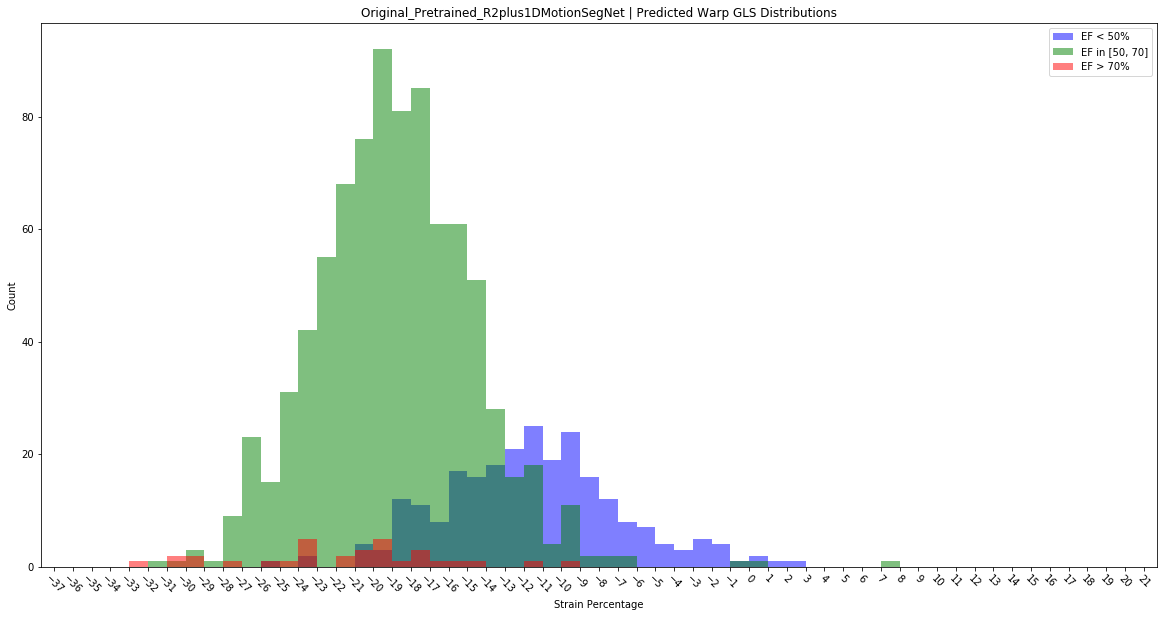

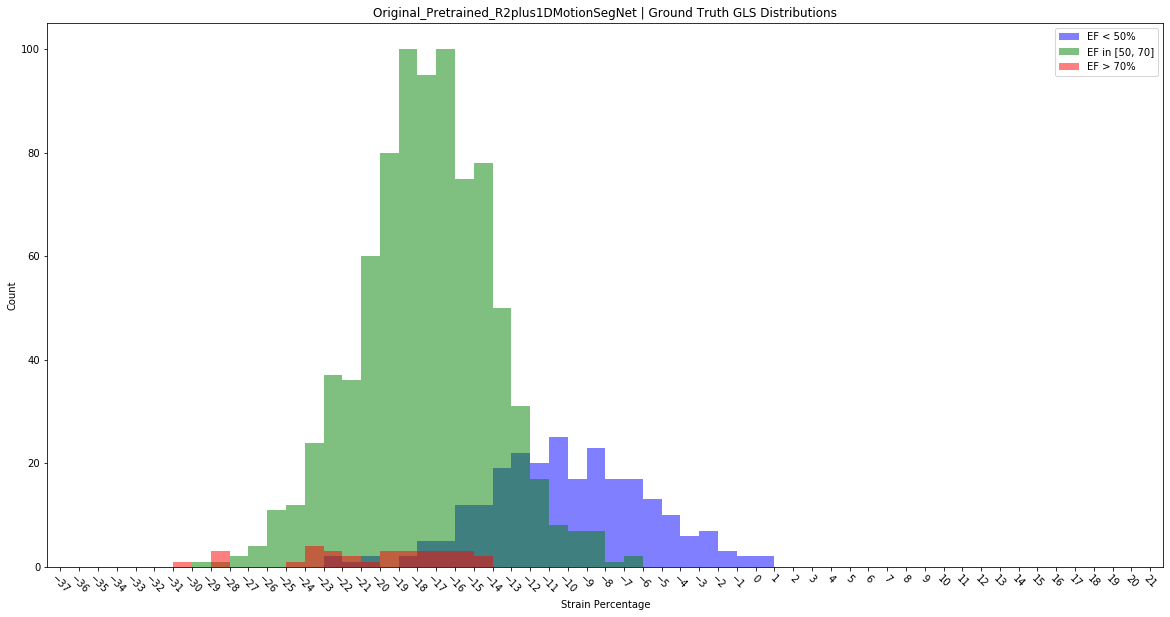

In [3]:
ef_grouping = "True EF"
gls_type = "Warp GLS"
create_GT = True

for name in filenames:
    if name[-4:] != ".csv":
        continue # skip this non csv file
    
    data = pd.read_csv(f'./csvs/{name}')
    
    _min = -0.35 * 100
    _max = 0.20 * 100
    step = 0.01 * 100
    
    ############## Predicted ##############
    low_efs = data.query(f"`{ef_grouping}` < 50")
    normal_efs = data.query(f"`{ef_grouping}` >= 50 and `{ef_grouping}` <= 70")
    high_efs = data.query(f"`{ef_grouping}` > 70")

    # multiple values by 100 to change data representation from decimal as a percent to regular value as a percent
    low_efs[f'{gls_type}'] *= 100
    normal_efs[f'{gls_type}'] *= 100
    high_efs[f'{gls_type}'] *= 100

    fig, ax = plt.subplots(1,1,figsize=(20,10))
    plt.hist(low_efs[f'{gls_type}'], bins=np.arange(_min, _max, step), color='blue', alpha=0.5, label='EF < 50%')
    plt.hist(normal_efs[f'{gls_type}'], bins=np.arange(_min, _max, step), color='green', alpha=0.5, label='EF in [50, 70]')
    plt.hist(high_efs[f'{gls_type}'], bins=np.arange(_min, _max, step), color='red', alpha=0.5, label='EF > 70%')

    plt.xticks(rotation = -45)

    loc = plticker.MultipleLocator(base=step) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)

    # labels = [item for item in ax.get_xticklabels()]

    plt.legend()
    plt.title(f'{name[:-11]} | Predicted {gls_type} Distributions')
    plt.xlabel('Strain Percentage')
    plt.ylabel('Count')
    if save_hists_as_svg:
        plt.savefig(f'./images/{name[:-11]}_predicted_hist.svg')

    # plt.show()
    
    ############## Ground Truth ##############
    if create_GT:
        truth_low_efs = data.query("`True EF` < 50")
        truth_normal_efs = data.query("`True EF` >= 50 and `True EF` <= 70")
        truth_high_efs = data.query("`True EF` > 70")

        truth_low_efs['True GLS'] *= 100
        truth_normal_efs['True GLS'] *= 100
        truth_high_efs['True GLS'] *= 100

        fig, ax = plt.subplots(1,1,figsize=(20,10))
        plt.hist(truth_low_efs['True GLS'], bins=np.arange(_min, _max, step), color='blue', alpha=0.5, label='EF < 50%')
        plt.hist(truth_normal_efs['True GLS'], bins=np.arange(_min, _max, step), color='green', alpha=0.5, label='EF in [50, 70]')
        plt.hist(truth_high_efs['True GLS'], bins=np.arange(_min, _max, step), color='red', alpha=0.5, label='EF > 70%')

        plt.xticks(rotation = -45)

        loc = plticker.MultipleLocator(base=step) # this locator puts ticks at regular intervals
        ax.xaxis.set_major_locator(loc)


        plt.legend()
        plt.title(f'{name[:-11]} | Ground Truth GLS Distributions')
        plt.xlabel('Strain Percentage')
        plt.ylabel('Count')
        if save_hists_as_svg:
            plt.savefig(f'./images/{name[:-11]}_truth_hist.svg')

    # plt.show()

In [4]:
filenames = os.listdir("./csvs/")
for name in filenames:
    if name[-4:] != '.csv':
        continue
    print(name[:-11])

Original_Pretrained_R2plus1DMotionSegNet
